# PCA 실습

## 정규화를 통해 계산하는 방법

### 1. 데이터 준비

In [24]:
import numpy as np
import pandas as pd

X = np.array([ 
              [0.2, 5.6, 3.56], 
              [0.45, 5.89, 2.4],
              [0.33, 6.37, 1.95],
              [0.54, 7.9, 1.32],
              [0.77, 7.87, 0.98]
])

### 2. 분산-공분산 매트릭스에 고유벡터와 고유값 계산
1. 각 열에 대해 평균을 빼고, 표준편차로 나누어 정규화를 한다.
2. $Z^{T}Z$를 통해 분산-공분산 매트릭스를 구한다.
3. 고유벡터와 고유값을 계산한다.

In [3]:
# 1
standardized_data = ( X - np.mean(X, axis = 0) ) / np.std(X, ddof = 1, axis = 0)
print("\n Standardized Data: \n", standardized_data)

# 2
covariance_matrix = np.cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)

# 3
values, vectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvalues: \n", values)
print("\n Eigenvectors: \n", vectors)


 Standardized Data: 
 [[-1.19298785 -1.0299848   1.5011907 ]
 [-0.03699187 -0.76471341  0.35403575]
 [-0.59186994 -0.32564351 -0.09098125]
 [ 0.37916668  1.07389179 -0.71400506]
 [ 1.44268298  1.04644992 -1.05024014]]

 Covariance Matrix: 
 [[ 1.          0.84166641 -0.88401004]
 [ 0.84166641  1.         -0.91327498]
 [-0.88401004 -0.91327498  1.        ]]

 Eigenvalues: 
 [2.75962684 0.1618075  0.07856566]

 Eigenvectors: 
 [[ 0.56991376  0.77982119  0.25899269]
 [ 0.57650106 -0.60406359  0.55023059]
 [-0.58552953  0.16427443  0.7938319 ]]


### 3. 입력 데이터를 고유벡터에 Projection 시킨다.
- `matmul()`메소드로 축에 프로젝션한다.

In [4]:
Z = np.matmul(standardized_data, vectors)

print("\n Projected Data: \n", Z)


 Projected Data: 
 [[-2.15267901 -0.06153364  0.31598878]
 [-0.66923865  0.4912475  -0.14930446]
 [-0.47177644 -0.27978923 -0.40469283]
 [ 1.25326312 -0.47030949  0.12228952]
 [ 2.04043099  0.32038486  0.11571899]]


## PCA 라이브러리를 사용하여 구현하기

In [6]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

# 1. 데이터를 가져온다.
print("Data: \n", X)

# 2. 정규화 라이브러리로 정규화를 진행한다.
scaler = StandardScaler()
Z = scaler.fit_transform(X)

# 3. 주성분 분석
pca = PCA(2) # 몇개의 pc를 쓸 것인지 정한다.
pca.fit(Z)

# 4. 고유값, 고유벡터 계산하기
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# 5. 정규화한 입력벡터를 고유벡터에 트랜잭션하기
B = pca.transform(Z)
print("\n Projected Data: \n", B)

Data: 
 [[0.2  5.6  3.56]
 [0.45 5.89 2.4 ]
 [0.33 6.37 1.95]
 [0.54 7.9  1.32]
 [0.77 7.87 0.98]]

 Eigenvectors: 
 [[-0.56991376 -0.57650106  0.58552953]
 [ 0.77982119 -0.60406359  0.16427443]]

 Eigenvalues: 
 [3.44953356 0.20225937]

 Projected Data: 
 [[ 2.4067683  -0.06879671]
 [ 0.74823156  0.5492314 ]
 [ 0.5274621  -0.31281387]
 [-1.40119076 -0.525822  ]
 [-2.2812712   0.35820117]]


> 🔍 정규화 결과가 다른 이유? <br>
> `Standard Deviation`에 쓰이는 자유도가 1 혹은 0의 차이이다.
> 자유도를 바꿔주면 동일한 값이 나온다.

# 💻 PCA 예제 실습

## `Penguins dataset`을 이용하여 4개의 feature를 2차원으로 PCA 시행하는 작업

- Dataset : http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset
- Features : `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 


### 1. 데이터 준비하기

In [47]:
import seaborn as sns
from sklearn.decomposition import PCA 

data = sns.load_dataset('penguins')
data = data.loc[:, ('species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g')] # 해당 열만 가져오기
data = data.dropna() # 결측치 제거

data = data.reset_index(drop=True)
data

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
337,Gentoo,47.2,13.7,214.0,4925.0
338,Gentoo,46.8,14.3,215.0,4850.0
339,Gentoo,50.4,15.7,222.0,5750.0
340,Gentoo,45.2,14.8,212.0,5200.0


In [48]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

x = data.loc[:, features].values
y = data.loc[:, 'species'].values


### 2. 스케일링 표준화
- 스케일에 영향을 받지 않기 위해 스케일링을 진행합니다.

In [49]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

x

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

### 3. PCA
- 2차원 데이터로 차원 축소를 진행합니다.
- 2차원 데이터와 Target(`data[['species']]`)를 합칩니다.

In [50]:
pca = PCA(n_components= 2)

PCs = pca.fit_transform(x)

data_PCA = pd.DataFrame(
    data = PCs,
    columns = ['PC1', 'PC2']
)

data_PCA

,PC1,PC2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210
...,...,...
337,2.006436,-0.958909
338,1.840886,-0.767714
339,2.760742,0.288886
340,1.722364,-0.704269


In [52]:
Y = data[['species']].dropna() # Target
data_PCA1 = pd.concat([data_PCA, Y], axis = 1)
data_PCA1

,PC1,PC2,species
0,-1.843445,0.047702,Adelie
1,-1.306762,-0.428348,Adelie
2,-1.369181,-0.154476,Adelie
3,-1.878827,-0.002048,Adelie
4,-1.911748,0.829210,Adelie
...,...,...,...
337,2.006436,-0.958909,Gentoo
338,1.840886,-0.767714,Gentoo
339,2.760742,0.288886,Gentoo
340,1.722364,-0.704269,Gentoo


### 4. 시각화

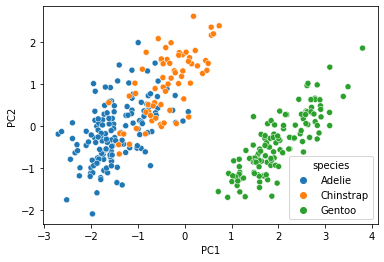

In [54]:
sns.scatterplot(data=data_PCA1,x='PC1',y='PC2',hue='species');

In [57]:
print('---eigen_value(고유값)---\n', pca.singular_values_, '\n')
print('---eigen_vector(고유벡터)--- \n',pca.components_.T, '\n')

print('---표준편차 (SD)---\n', np.sqrt(pca.explained_variance_), '\n')
print('---분산비율 (Variance_ratio)--- \n',pca.explained_variance_ratio_, '\n')

---eigen_value(고유값)---
 [30.68850359 16.25425267] 

---eigen_vector(고유벡터)--- 
 [[ 0.45525033  0.59703114]
 [-0.40033468  0.79776657]
 [ 0.57601332  0.0022822 ]
 [ 0.54835019  0.08436292]] 

---표준편차 (SD)---
 [1.66187564 0.88021713] 

---분산비율 (Variance_ratio)--- 
 [0.68843878 0.19312919] 



### 5. Screeplot 

Text(3.0, 85, '90%')

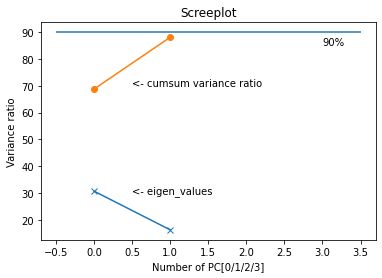

In [63]:
import matplotlib.pyplot as plt

plt.title('Screeplot')
plt.xlabel('Number of PC[0/1/2/3]')
plt.ylabel('Variance ratio')

sumvals = np.cumsum(pca.explained_variance_ratio_)*100 # 누적 분산 비율

plt.plot(pca.singular_values_, 'x-'); # 고유벡터
plt.plot(sumvals, 'o-'); # 누적 분산 비율
plt.hlines(90, xmin=-0.5, xmax=3.5); # 90% 선


plt.annotate('<- eigen_values',xy=(0.5,30)) # 고유값 
plt.annotate('<- cumsum variance ratio',xy=(0.5,70)) # 누적 분산 비율
plt.annotate('90%',xy=(3.0,85)) # 90% 

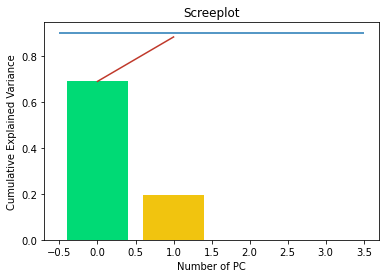

In [64]:
sumvals = np.cumsum(pca.explained_variance_ratio_) # 누적 분산 비율
N0fPC = np.arange(len(pca.explained_variance_ratio_)) #PC 수
vals = pca.explained_variance_ratio_ #분산

plt.title('Screeplot')
plt.xlabel('Number of PC')
plt.ylabel('Cumulative Explained Variance')

a = plt.bar(N0fPC, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # bar

# plt.plot(pca.singular_values_, 'x-'); 
plt.plot(N0fPC, sumvals, color = '#c0392b'); #line
plt.hlines(0.9, xmin=-0.5, xmax=3.5) # 90% line